
# **Preliminaries**

The main goal in our project was to find the 'y' lable of our data set which is 'h' in our hamiltonian and determines the phases of system, we treat this goal as a regressrion problem in the previous milestone, but now for the 3rd milestone with neural network we decided to solve both regression and classification problems. In order to solve our problem from classification point of view we delete the phase transition point in our data set and assumed that we have only h < 1 and h > 1 samples which we want to classify. For this purpose we assign 0 to all h < 1 samples (Ferromagnetic Phase) and 1 to all h > 1 samples (Paramagnetic Phase), so it's a binary classification problem.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns
import tensorflow as tf
from tensorflow import keras as ks
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

# **Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path ='/content/drive/MyDrive/Data_Classification.csv'
data = pd.read_csv(path)

In [4]:
x = data.iloc[:,:4186]
x = np.array(x)
y = data['y']

In [5]:
# Changing 'y' lable to 0 for h < 1 and 1 for h > 1 for binary classification problem
for i in range (0,100):
  y[i]=0
for i in range (100,700):
  y[i]=1

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [61]:
print(y_train.shape)
print(y_test.shape)

(490,)
(210,)


In [7]:
from keras.utils import np_utils
y_u = np_utils.to_categorical(y)
y_u_test = np_utils.to_categorical(y_test)
y_u_train = np_utils.to_categorical(y_train)

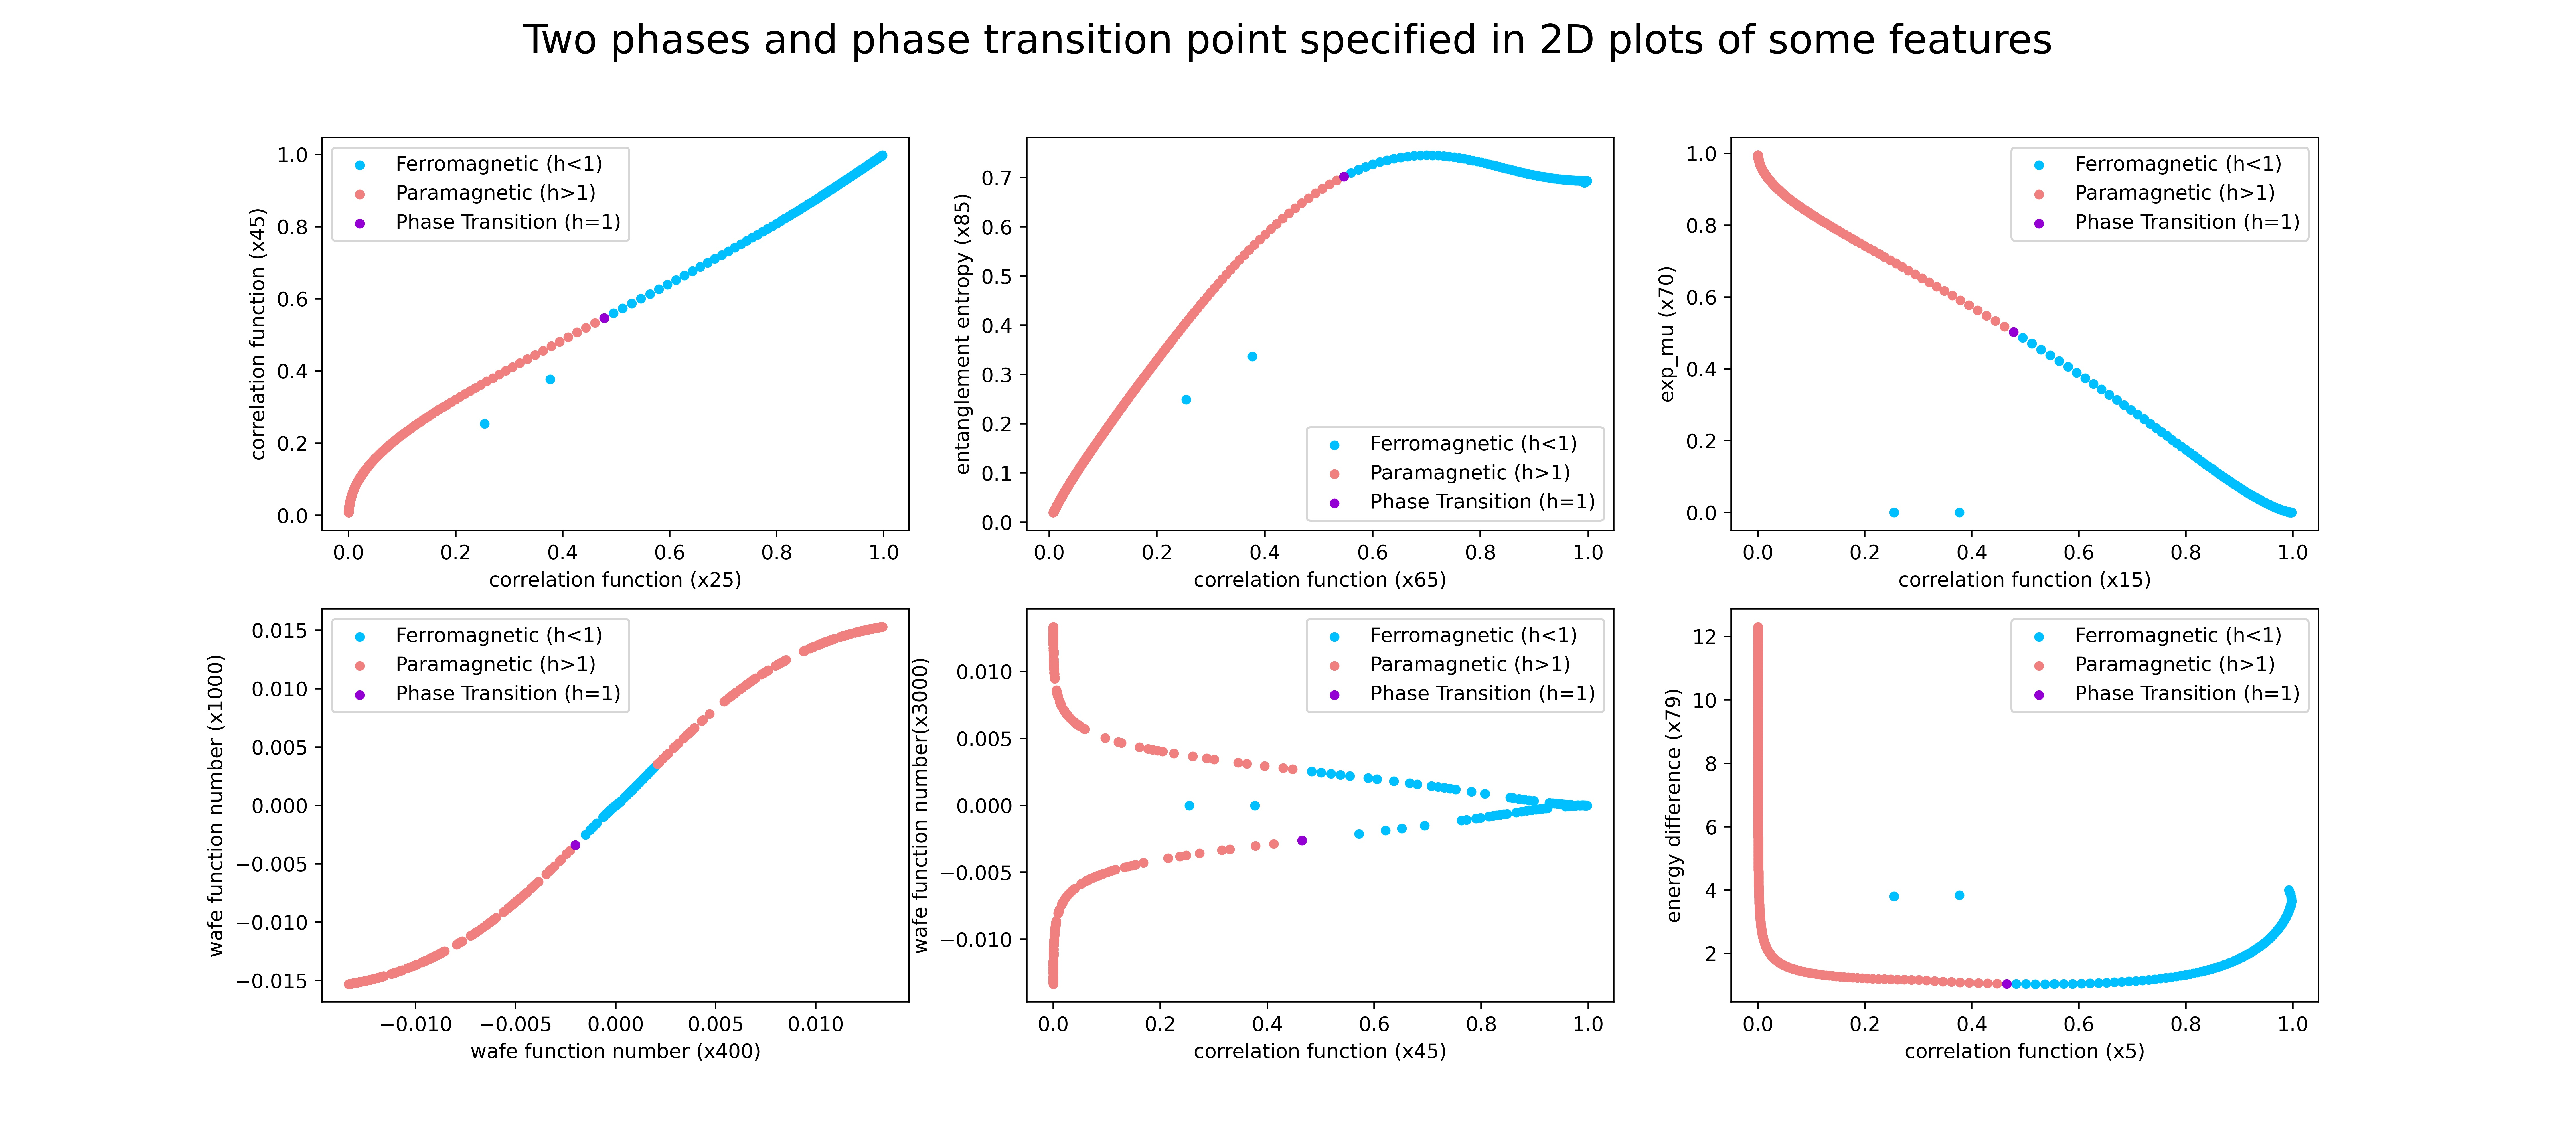

# **Feedforward Neural Network**

**Different** **activation** **functions**

In [8]:
model = ks.Sequential()
model.add(ks.layers.Dense(20, activation=ks.activations.tanh, input_dim =  4186))
model.add(ks.layers.Dense(20, activation=ks.activations.relu))
model.add(ks.layers.Dense(20, activation=ks.activations.softsign))
model.add(ks.layers.Dense(209, activation=ks.activations.softmax))
model.add(ks.layers.Dense(211, activation=ks.activations.tanh))
model.add(ks.layers.Dense(20, activation=ks.activations.tanh))
model.add(ks.layers.Dense(20, activation=ks.activations.tanh))
model.add(ks.layers.Dense(2, activation=ks.activations.sigmoid))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                83740     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 209)               4389      
_________________________________________________________________
dense_4 (Dense)              (None, 211)               44310     
_________________________________________________________________
dense_5 (Dense)              (None, 20)                4240      
_________________________________________________________________
dense_6 (Dense)              (None, 20)                4

In [9]:
model.compile( loss=ks.losses.binary_crossentropy  , 
              optimizer = ks.optimizers.Adam() ,  
              metrics = 'acc')

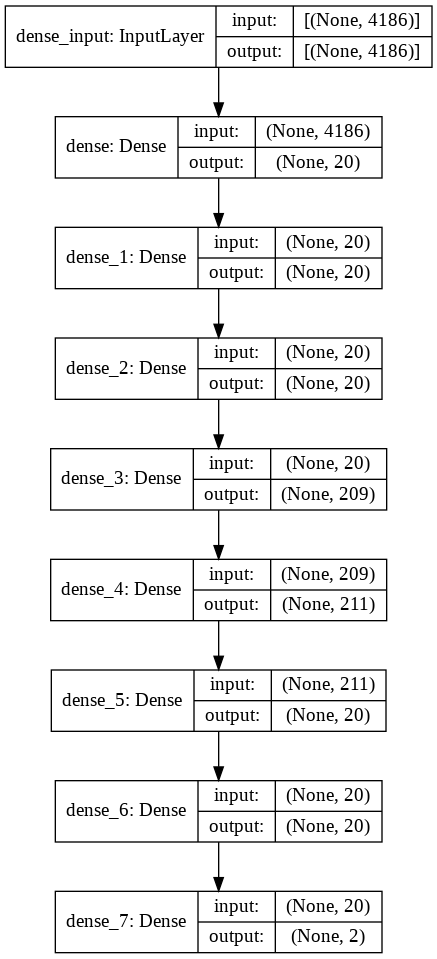

In [10]:
from  tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True,)

In [11]:
%%time
history = model.fit(x_train, y_u_train, epochs=80, batch_size=30,  verbose=1, validation_data = (x_test,y_u_test))

Epoch 1/80
17/17 [==============================] - 1s 22ms/step - loss: 0.5850 - acc: 0.7980 - val_loss: 0.4307 - val_acc: 0.8810
Epoch 2/80
17/17 [==============================] - 0s 5ms/step - loss: 0.4349 - acc: 0.8469 - val_loss: 0.3606 - val_acc: 0.8810
Epoch 3/80
17/17 [==============================] - 0s 5ms/step - loss: 0.4185 - acc: 0.8469 - val_loss: 0.3455 - val_acc: 0.8810
Epoch 4/80
17/17 [==============================] - 0s 5ms/step - loss: 0.3774 - acc: 0.8469 - val_loss: 0.2858 - val_acc: 0.8810
Epoch 5/80
17/17 [==============================] - 0s 5ms/step - loss: 0.2425 - acc: 0.8898 - val_loss: 0.1210 - val_acc: 0.9952
Epoch 6/80
17/17 [==============================] - 0s 5ms/step - loss: 0.0779 - acc: 0.9939 - val_loss: 0.0492 - val_acc: 0.9952
Epoch 7/80
17/17 [==============================] - 0s 6ms/step - loss: 0.0356 - acc: 0.9959 - val_loss: 0.0404 - val_acc: 0.9905
Epoch 8/80
17/17 [==============================] - 0s 5ms/step - loss: 0.0383 - acc: 0.9

#**Loss** **&** **Accuracy** **Curve**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

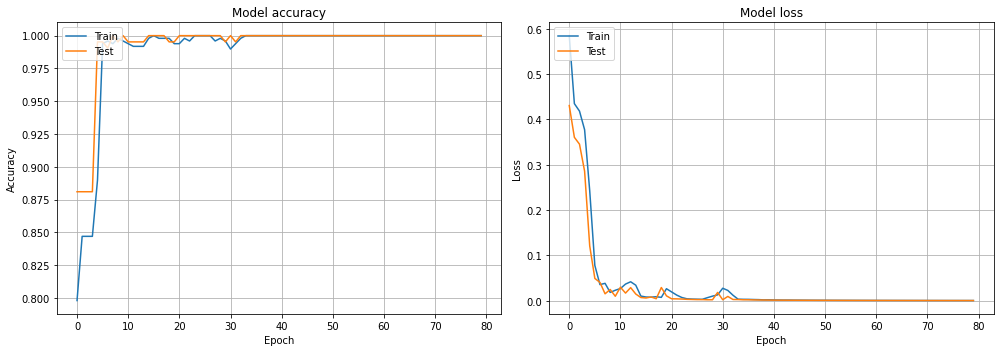

In [18]:
fig = plt.figure(figsize=(14,5))
# Plot training & validation accuracy values
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy', xlabel= 'Epoch')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Train', 'Test'], loc='upper left')
ax.grid()

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss' , xlabel= 'Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')
ax.grid()

plt.tight_layout()

plt.savefig("loss_acc.jpg",dpi=150)
files.download("loss_acc.jpg") 

# **Evaluation**

In [13]:
%%time
y_pred = model.predict(x_test)

CPU times: user 125 ms, sys: 7.89 ms, total: 133 ms
Wall time: 142 ms


In [14]:
y_u_pred = model.predict(x_test)
pred = list()
for i in range(len(y_pred)):
     pred.append(np.argmax(y_u_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_u_test[i]))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

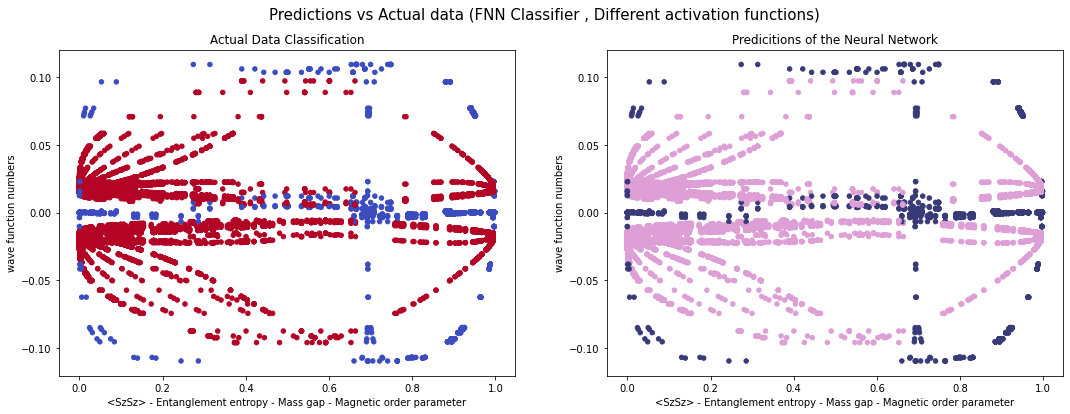

In [17]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,2,1, title = 'Actual Data Classification',xlabel = '<SzSz> - Entanglement entropy - Mass gap - Magnetic order parameter', ylabel='wave function numbers')
for i in np.arange(0,90,5):
  for j in np.arange(91,4186,1000):
    ax.scatter(x_test[:,i], x_test[:,j], c = test , cmap=plt.cm.coolwarm, s=20)

ax = fig.add_subplot(1,2,2, title = 'Predicitions of the Neural Network', xlabel = '<SzSz> - Entanglement entropy - Mass gap - Magnetic order parameter', ylabel='wave function numbers')
for i in np.arange(0,90, 5):
  for j in np.arange(91,4186, 1000):
    ax.scatter(x_test[:,i], x_test[:,j], c = pred  , cmap=plt.cm.tab20b, s=20)

fig.suptitle("Predictions vs Actual data (FNN Classifier , Different activation functions)",fontsize = 15)
plt.savefig("pred.jpg",dpi=150)
files.download("pred.jpg") 

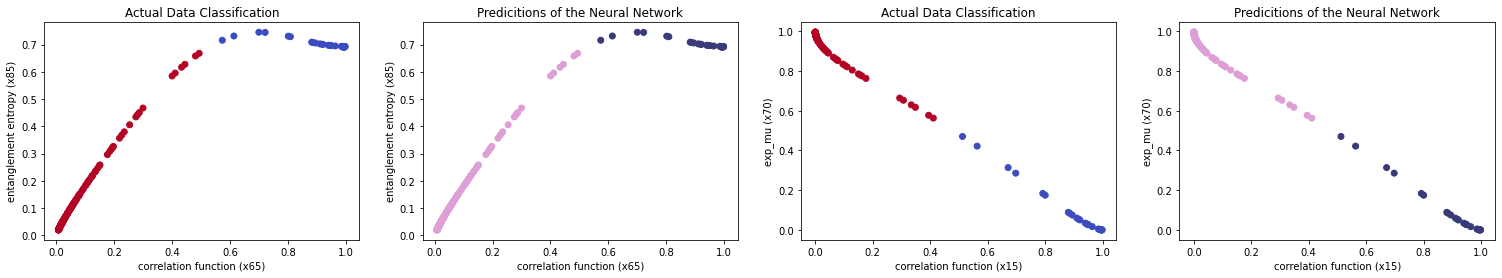

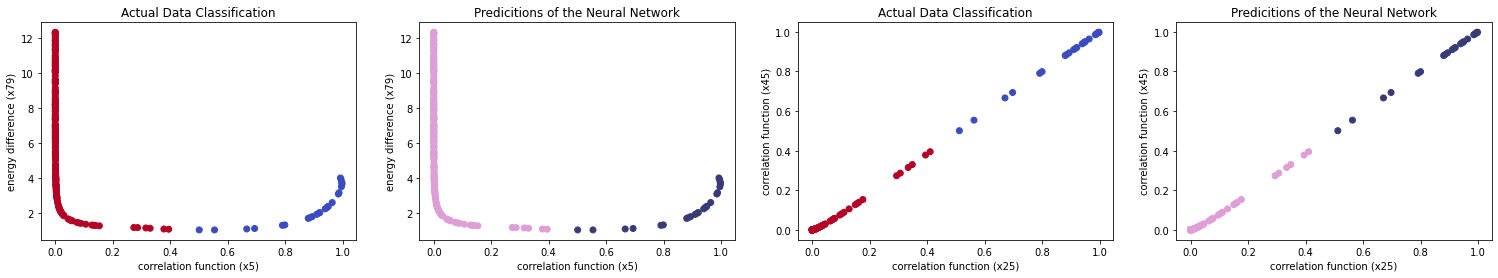

In [19]:
fig = plt.figure(figsize=(26,4))

ax = fig.add_subplot(141 , xlabel = 'correlation function (x65)', ylabel='entanglement entropy (x85)' , title = 'Actual Data Classification')
ax.scatter(x_test[:,64], x_test[:,84], c= test ,cmap=plt.cm.coolwarm)    

ax = fig.add_subplot(142 , xlabel = 'correlation function (x65)', ylabel='entanglement entropy (x85)' , title = 'Predicitions of the Neural Network')
plt.scatter(x_test[:,64], x_test[:,84],  c = pred ,cmap=plt.cm.tab20b)

ax = fig.add_subplot(143 , xlabel = 'correlation function (x15)', ylabel='exp_mu (x70)' , title = 'Actual Data Classification')
ax.scatter(x_test[:,14], x_test[:,69], c= test ,cmap=plt.cm.coolwarm)    

ax = fig.add_subplot(144 , xlabel = 'correlation function (x15)', ylabel='exp_mu (x70)' , title = 'Predicitions of the Neural Network')
plt.scatter(x_test[:,14], x_test[:,69],  c = pred ,cmap=plt.cm.tab20b)


fig = plt.figure(figsize=(26,4))
ax = fig.add_subplot(141 , xlabel = 'correlation function (x5)', ylabel='energy difference (x79)' , title = 'Actual Data Classification')

ax.scatter(x_test[:,4].T, x_test[:,78] , c= test,cmap=plt.cm.coolwarm)    

ax = fig.add_subplot(142 , xlabel = 'correlation function (x5)', ylabel='energy difference (x79)' , title = 'Predicitions of the Neural Network')
plt.scatter(x_test[:,4].T, x_test[:,78] , c = pred,cmap=plt.cm.tab20b)

ax = fig.add_subplot(143 , xlabel = 'correlation function (x25)', ylabel='correlation function (x45)' , title = 'Actual Data Classification')
ax.scatter(x_test[:,24], x_test[:,44], c= test ,cmap=plt.cm.coolwarm)    

ax = fig.add_subplot(144 , xlabel = 'correlation function (x25)', ylabel='correlation function (x45)' , title = 'Predicitions of the Neural Network')
plt.scatter(x_test[:,24], x_test[:,44],  c = pred ,cmap=plt.cm.tab20b)

# **classification report**

In [20]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
clf_report_rf = classification_report(test,pred)
print(clf_report_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00       185

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



# **confusion matrix**

In [21]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

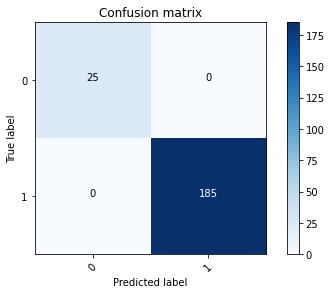

In [22]:
cm = confusion_matrix(pred, test)
plot_confusion_matrix(cm,[0,1])

plt.savefig("confusion_matrix.jpg",dpi=150)
files.download("confusion_matrix.jpg") 

# **Tuning**

In [23]:
!pip install -q -U keras-tuner
import kerastuner as kt

In [24]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def model_fnn(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=20,
                                            max_value=220,
                                            step=10),
                               activation=hp.Choice('act_'+ str(i), ['relu','softmax','tanh',])))
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',values = [0.1,0.01,0.001])),
        loss='binary_crossentropy',
        metrics=['acc'])
    return model

# RandomSearch Optimization

In [25]:
tuner = RandomSearch(
    model_fnn,
    objective='acc',
    max_trials=4,
    executions_per_trial=3,
    directory='ml_project')

In [26]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 220, 'step': 10, 'sampling': None}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'softmax', 'tanh'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 220, 'step': 10, 'sampling': None}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'softmax', 'tanh'], 'ordered': False}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001], 'ordered': True}


In [27]:
tuner.search(x_train, y_u_train,
             epochs=100,
             batch_size = 30,
             validation_data=(x_test, y_u_test))

Trial 4 Complete [00h 00m 43s]
acc: 0.8965986569722494

Best acc So Far: 1.0
Total elapsed time: 00h 02m 45s
INFO:tensorflow:Oracle triggered exit


In [28]:
tuner.results_summary()

Results summary
Results in ml_project/untitled_project
Showing 10 best trials
Objective(name='acc', direction='max')
Trial summary
Hyperparameters:
num_layers: 6
units_0: 60
act_0: relu
units_1: 70
act_1: relu
learning_rate: 0.001
units_2: 20
act_2: relu
units_3: 20
act_3: relu
units_4: 20
act_4: relu
units_5: 20
act_5: relu
Score: 1.0
Trial summary
Hyperparameters:
num_layers: 3
units_0: 110
act_0: softmax
units_1: 170
act_1: tanh
learning_rate: 0.1
units_2: 130
act_2: relu
units_3: 140
act_3: softmax
units_4: 130
act_4: softmax
units_5: 110
act_5: tanh
Score: 0.9931972821553549
Trial summary
Hyperparameters:
num_layers: 5
units_0: 30
act_0: softmax
units_1: 120
act_1: relu
learning_rate: 0.1
units_2: 130
act_2: tanh
units_3: 80
act_3: tanh
units_4: 140
act_4: relu
units_5: 210
act_5: softmax
Score: 0.8965986569722494
Trial summary
Hyperparameters:
num_layers: 3
units_0: 40
act_0: softmax
units_1: 160
act_1: softmax
learning_rate: 0.001
units_2: 190
act_2: softmax
units_3: 40
act_3: s

In [34]:
%%time
bestrs_model = tuner.get_best_models()[0]
history = bestrs_model.fit(x_train, y_u_train, epochs=80, batch_size=20,  verbose=1, validation_data = (x_test,y_u_test))

Epoch 1/80
25/25 [==============================] - 1s 10ms/step - loss: 0.0070 - acc: 0.9959 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 2/80
25/25 [==============================] - 0s 4ms/step - loss: 0.0090 - acc: 0.9959 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 3/80
25/25 [==============================] - 0s 4ms/step - loss: 0.0073 - acc: 0.9980 - val_loss: 0.0113 - val_acc: 0.9952
Epoch 4/80
25/25 [==============================] - 0s 4ms/step - loss: 0.0113 - acc: 0.9959 - val_loss: 0.0043 - val_acc: 0.9952
Epoch 5/80
25/25 [==============================] - 0s 4ms/step - loss: 0.0070 - acc: 0.9959 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 6/80
25/25 [==============================] - 0s 4ms/step - loss: 0.0136 - acc: 0.9959 - val_loss: 0.0093 - val_acc: 0.9952
Epoch 7/80
25/25 [==============================] - 0s 4ms/step - loss: 0.0106 - acc: 0.9959 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 8/80
25/25 [==============================] - 0s 5ms/step - loss: 0.0059 - acc: 0.9

In [30]:
bestrs_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                251220    
_________________________________________________________________
dense_1 (Dense)              (None, 70)                4270      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1420      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 4

# **Loss & Accuracy Curve**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

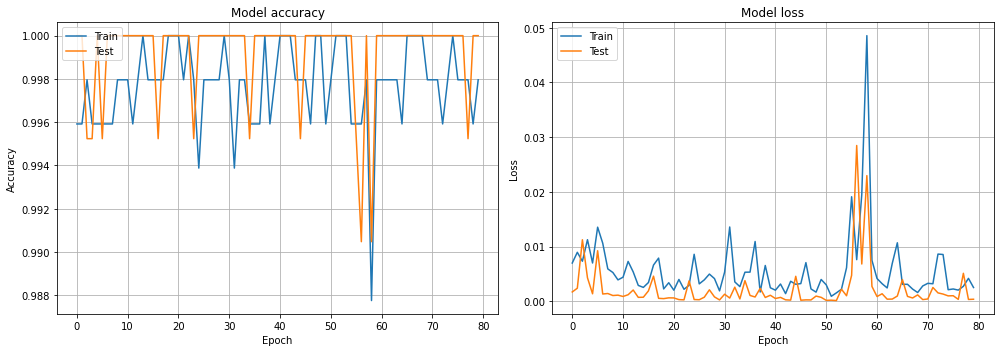

In [35]:
fig = plt.figure(figsize=(14,5))
# Plot training & validation accuracy values
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy',xlabel= 'Epoch')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Train', 'Test'], loc='upper left')
ax.grid()

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss',xlabel= 'Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')
ax.grid()

plt.tight_layout()

plt.savefig("rs_loss_acc.jpg",dpi=150)
files.download("rs_loss_acc.jpg") 

# **Evaluation**

In [36]:
%%time
y_pred = bestrs_model.predict(x_test)

CPU times: user 105 ms, sys: 2.74 ms, total: 108 ms
Wall time: 104 ms


In [37]:
y_u_pred = bestrs_model.predict(x_test)
pred = list()
for i in range(len(y_pred)):
     pred.append(np.argmax(y_u_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_u_test[i]))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

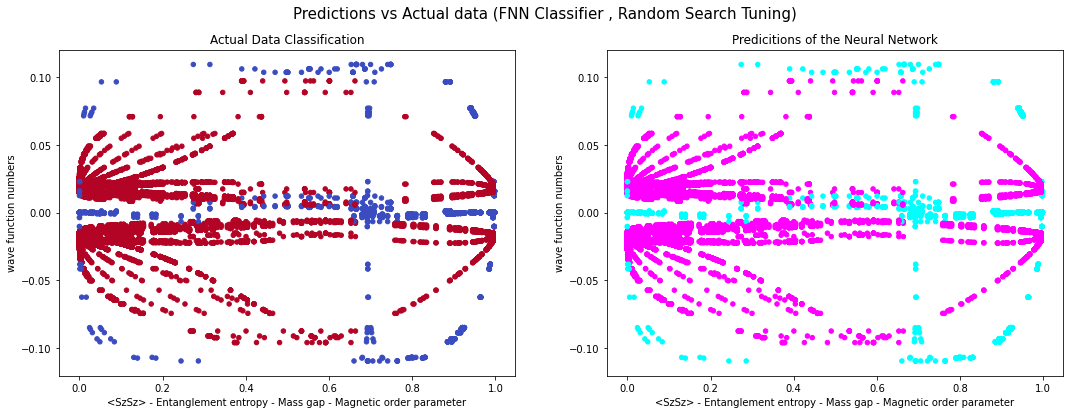

In [38]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,2,1, title = 'Actual Data Classification',xlabel = '<SzSz> - Entanglement entropy - Mass gap - Magnetic order parameter', ylabel='wave function numbers')
for i in np.arange(0,90,5):
  for j in np.arange(91,4186,1000):
    ax.scatter(x_test[:,i], x_test[:,j], c = test , cmap=plt.cm.coolwarm, s=20)

ax = fig.add_subplot(1,2,2, title = 'Predicitions of the Neural Network', xlabel = '<SzSz> - Entanglement entropy - Mass gap - Magnetic order parameter', ylabel='wave function numbers')
for i in np.arange(0,90, 5):
  for j in np.arange(91,4186, 1000):
    ax.scatter(x_test[:,i], x_test[:,j], c = pred  , cmap=plt.cm.cool, s=20)

fig.suptitle("Predictions vs Actual data (FNN Classifier , Random Search Tuning)",fontsize = 15)
plt.savefig("rs_pred.jpg",dpi=150)
files.download("rs_pred.jpg") 

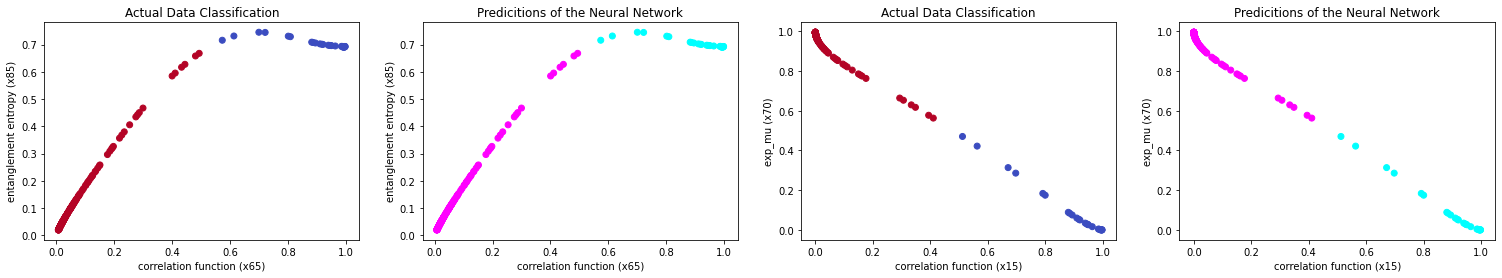

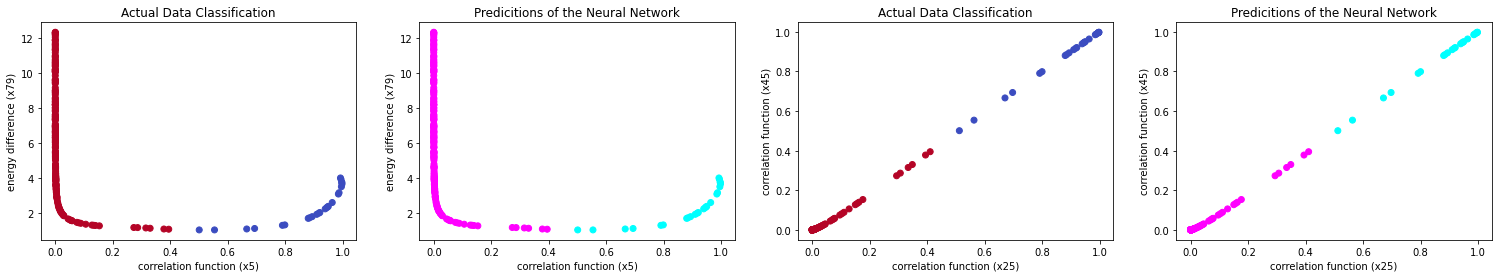

In [39]:
fig = plt.figure(figsize=(26,4))


ax = fig.add_subplot(141 , xlabel = 'correlation function (x65)', ylabel='entanglement entropy (x85)' , title = 'Actual Data Classification')
ax.scatter(x_test[:,64], x_test[:,84], c= test ,cmap=plt.cm.coolwarm)    

ax = fig.add_subplot(142 , xlabel = 'correlation function (x65)', ylabel='entanglement entropy (x85)' , title = 'Predicitions of the Neural Network')
plt.scatter(x_test[:,64], x_test[:,84],  c = pred ,cmap=plt.cm.cool)

ax = fig.add_subplot(143 , xlabel = 'correlation function (x15)', ylabel='exp_mu (x70)' , title = 'Actual Data Classification')
ax.scatter(x_test[:,14], x_test[:,69], c= test ,cmap=plt.cm.coolwarm)    

ax = fig.add_subplot(144 , xlabel = 'correlation function (x15)', ylabel='exp_mu (x70)' , title = 'Predicitions of the Neural Network')
plt.scatter(x_test[:,14], x_test[:,69],  c = pred ,cmap=plt.cm.cool)


fig = plt.figure(figsize=(26,4))
ax = fig.add_subplot(141 , xlabel = 'correlation function (x5)', ylabel='energy difference (x79)' , title = 'Actual Data Classification')

ax.scatter(x_test[:,4].T, x_test[:,78] , c= test,cmap=plt.cm.coolwarm)    

ax = fig.add_subplot(142 , xlabel = 'correlation function (x5)', ylabel='energy difference (x79)' , title = 'Predicitions of the Neural Network')
plt.scatter(x_test[:,4].T, x_test[:,78] , c = pred,cmap=plt.cm.cool)

ax = fig.add_subplot(143 , xlabel = 'correlation function (x25)', ylabel='correlation function (x45)' , title = 'Actual Data Classification')
ax.scatter(x_test[:,24], x_test[:,44], c= test ,cmap=plt.cm.coolwarm)    

ax = fig.add_subplot(144 , xlabel = 'correlation function (x25)', ylabel='correlation function (x45)' , title = 'Predicitions of the Neural Network')
plt.scatter(x_test[:,24], x_test[:,44],  c = pred ,cmap=plt.cm.cool)


# **classification report**

In [40]:
clf_report_rf = classification_report(test,pred)
print(clf_report_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00       185

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



# **confusion matrix**

In [41]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.YlGn):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

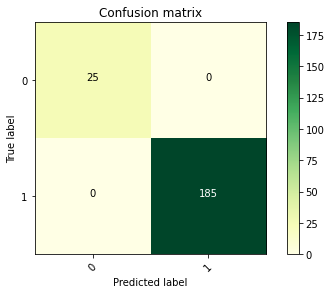

In [42]:
cm = confusion_matrix(pred, test)
plot_confusion_matrix(cm,[0,1])

plt.savefig("rs_confusion_matrix.jpg",dpi=150)
files.download("rs_confusion_matrix.jpg") 

# **Bayesian Optimization**




In [43]:
from kerastuner.tuners import BayesianOptimization
tuner = BayesianOptimization(
    model_fnn,
    objective='acc',
    max_trials=4,
    num_initial_points=2,
    alpha=0.0001,
    beta=2.6,
    overwrite=True,
)

In [44]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 220, 'step': 10, 'sampling': None}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'softmax', 'tanh'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 220, 'step': 10, 'sampling': None}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'softmax', 'tanh'], 'ordered': False}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001], 'ordered': True}


In [45]:
tuner.search(x_train, y_u_train,
             epochs=150,
             batch_size = 30,
             validation_data=(x_test, y_u_test))

Trial 4 Complete [00h 00m 21s]
acc: 1.0

Best acc So Far: 1.0
Total elapsed time: 00h 01m 22s
INFO:tensorflow:Oracle triggered exit


In [46]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='acc', direction='max')
Trial summary
Hyperparameters:
num_layers: 4
units_0: 90
act_0: relu
units_1: 190
act_1: tanh
learning_rate: 0.001
units_2: 20
act_2: relu
units_3: 20
act_3: relu
Score: 1.0
Trial summary
Hyperparameters:
num_layers: 5
units_0: 70
act_0: relu
units_1: 120
act_1: softmax
learning_rate: 0.001
units_2: 210
act_2: tanh
units_3: 160
act_3: softmax
units_4: 20
act_4: relu
Score: 1.0
Trial summary
Hyperparameters:
num_layers: 2
units_0: 20
act_0: relu
units_1: 220
act_1: tanh
learning_rate: 0.001
units_2: 120
act_2: tanh
units_3: 20
act_3: tanh
units_4: 20
act_4: relu
units_5: 30
act_5: relu
units_6: 50
act_6: relu
units_7: 30
act_7: relu
units_8: 40
act_8: softmax
units_9: 50
act_9: softmax
Score: 1.0
Trial summary
Hyperparameters:
num_layers: 10
units_0: 120
act_0: tanh
units_1: 20
act_1: relu
learning_rate: 0.1
units_2: 210
act_2: relu
units_3: 170
act_3: relu
units_4: 110
act_4: sof

In [50]:
%%time
bestbo_model = tuner.get_best_models()[0]
history = bestbo_model.fit(x_train, y_u_train, epochs=100, batch_size=30,  verbose=1, validation_data = (x_test,y_u_test))

Epoch 1/100
17/17 [==============================] - 1s 14ms/step - loss: 0.0067 - acc: 0.9959 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0064 - acc: 0.9980 - val_loss: 0.0063 - val_acc: 0.9952
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0090 - acc: 0.9980 - val_loss: 0.0059 - val_acc: 0.9952
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0082 - acc: 0.9939 - val_loss: 0.0071 - val_acc: 0.9952
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0080 - acc: 0.9959 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0105 - acc: 0.9939 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0038 - acc: 0.9980 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0034 - 

In [48]:
bestbo_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 90)                376830    
_________________________________________________________________
dense_1 (Dense)              (None, 190)               17290     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                3820      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 42        
Total params: 398,402
Trainable params: 398,402
Non-trainable params: 0
_________________________________________________________________


# **Loss & Accuracy Curve**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

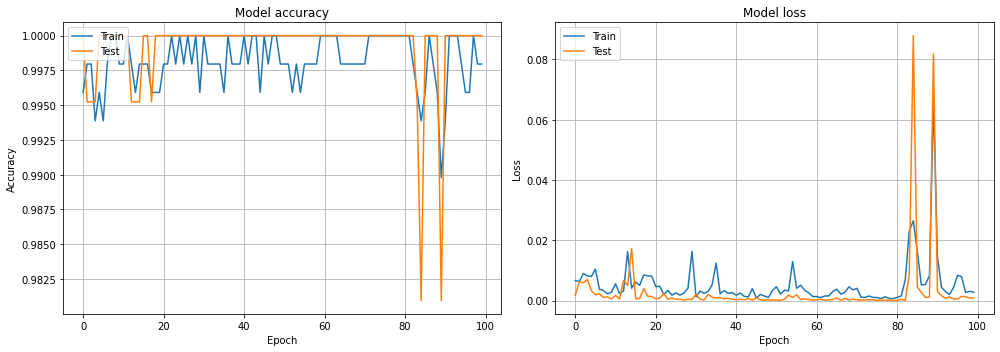

In [51]:
fig = plt.figure(figsize=(14,5))
# Plot training & validation accuracy values
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy',xlabel= 'Epoch')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Train', 'Test'], loc='upper left')
ax.grid()

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss',xlabel= 'Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')
ax.grid()

plt.tight_layout()

from google.colab import files
plt.savefig("op_loss_acc.jpg",dpi=150)
files.download("op_loss_acc.jpg") 

# **Evaluation**

In [52]:
%%time
y_pred = bestbo_model.predict(x_test)

CPU times: user 92.9 ms, sys: 837 µs, total: 93.7 ms
Wall time: 88.9 ms


In [53]:
y_u_pred = bestrs_model.predict(x_test)
pred = list()
for i in range(len(y_pred)):
     pred.append(np.argmax(y_u_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_u_test[i]))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

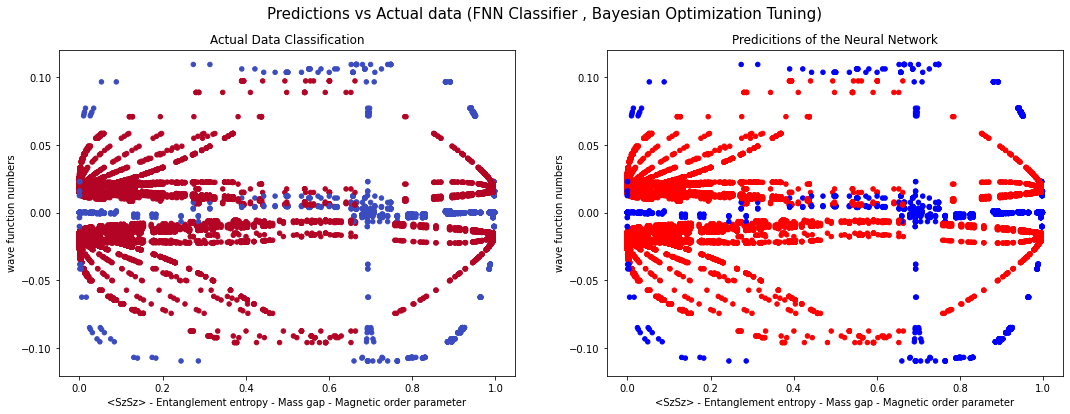

In [54]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,2,1, title = 'Actual Data Classification',xlabel = '<SzSz> - Entanglement entropy - Mass gap - Magnetic order parameter', ylabel='wave function numbers')
for i in np.arange(0,90,5):
  for j in np.arange(91,4186,1000):
    ax.scatter(x_test[:,i], x_test[:,j], c = test , cmap=plt.cm.coolwarm, s=20)

ax = fig.add_subplot(1,2,2, title = 'Predicitions of the Neural Network', xlabel = '<SzSz> - Entanglement entropy - Mass gap - Magnetic order parameter', ylabel='wave function numbers')
for i in np.arange(0,90, 5):
  for j in np.arange(91,4186, 1000):
    ax.scatter(x_test[:,i], x_test[:,j], c = pred  , cmap=plt.cm.bwr, s=20)

fig.suptitle("Predictions vs Actual data (FNN Classifier , Bayesian Optimization Tuning)",fontsize = 15)
plt.savefig("bo_pred.jpg",dpi=150)
files.download("bo_pred.jpg") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

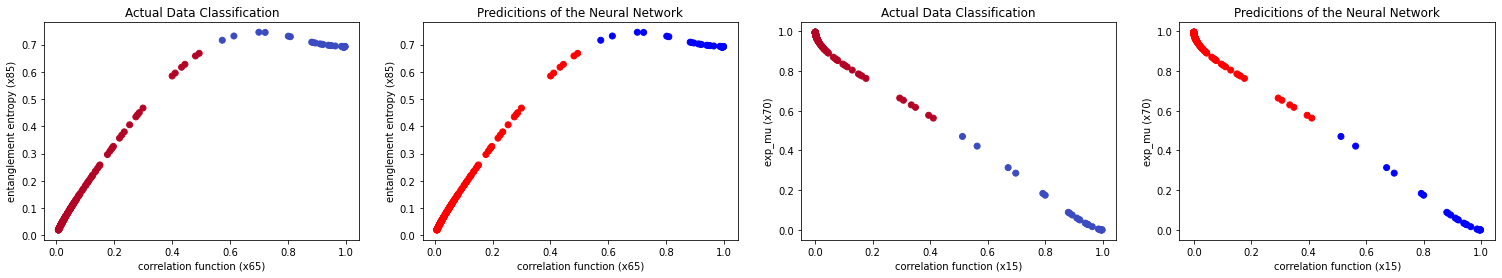

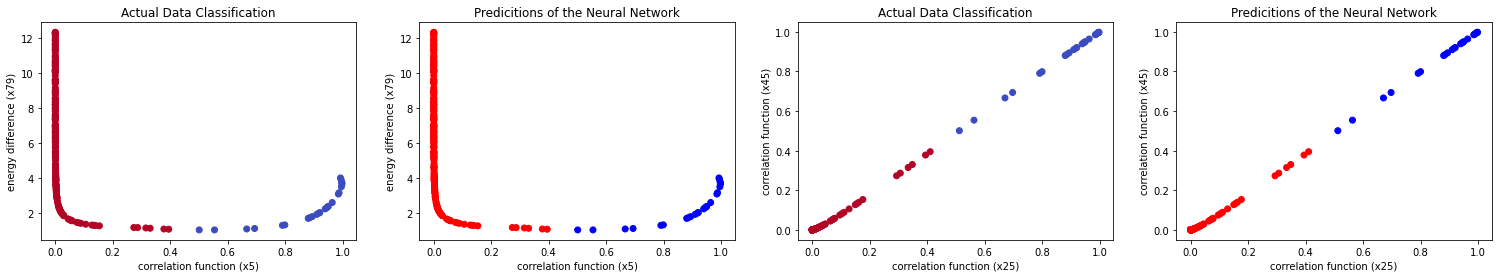

In [55]:
fig = plt.figure(figsize=(26,4))


ax = fig.add_subplot(141 , xlabel = 'correlation function (x65)', ylabel='entanglement entropy (x85)' , title = 'Actual Data Classification')
ax.scatter(x_test[:,64], x_test[:,84], c= test ,cmap=plt.cm.coolwarm)    

ax = fig.add_subplot(142 , xlabel = 'correlation function (x65)', ylabel='entanglement entropy (x85)' , title = 'Predicitions of the Neural Network')
plt.scatter(x_test[:,64], x_test[:,84],  c = pred ,cmap=plt.cm.bwr)

ax = fig.add_subplot(143 , xlabel = 'correlation function (x15)', ylabel='exp_mu (x70)' , title = 'Actual Data Classification')
ax.scatter(x_test[:,14], x_test[:,69], c= test ,cmap=plt.cm.coolwarm)    

ax = fig.add_subplot(144 , xlabel = 'correlation function (x15)', ylabel='exp_mu (x70)' , title = 'Predicitions of the Neural Network')
plt.scatter(x_test[:,14], x_test[:,69],  c = pred ,cmap=plt.cm.bwr)


fig = plt.figure(figsize=(26,4))
ax = fig.add_subplot(141 , xlabel = 'correlation function (x5)', ylabel='energy difference (x79)' , title = 'Actual Data Classification')

ax.scatter(x_test[:,4].T, x_test[:,78] , c= test,cmap=plt.cm.coolwarm)    

ax = fig.add_subplot(142 , xlabel = 'correlation function (x5)', ylabel='energy difference (x79)' , title = 'Predicitions of the Neural Network')
plt.scatter(x_test[:,4].T, x_test[:,78] , c = pred,cmap=plt.cm.bwr)

ax = fig.add_subplot(143 , xlabel = 'correlation function (x25)', ylabel='correlation function (x45)' , title = 'Actual Data Classification')
ax.scatter(x_test[:,24], x_test[:,44], c= test ,cmap=plt.cm.coolwarm)    

ax = fig.add_subplot(144 , xlabel = 'correlation function (x25)', ylabel='correlation function (x45)' , title = 'Predicitions of the Neural Network')
plt.scatter(x_test[:,24], x_test[:,44],  c = pred ,cmap=plt.cm.bwr)


plt.savefig("bo_pred_mix.jpg",dpi=150)
files.download("bo_pred_mix.jpg") 

# **classification report**

In [56]:
clf_report_rf = classification_report(test,pred)
print(clf_report_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00       185

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



# **confusion matrix**

In [57]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

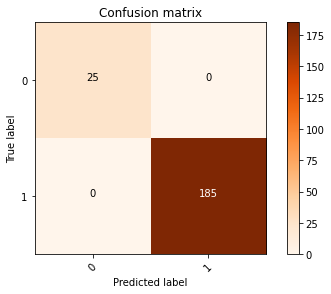

In [58]:
cm = confusion_matrix(pred, test)
plot_confusion_matrix(cm,[0,1])

plt.savefig("bo_confusion_matrix.jpg",dpi=150)
files.download("bo_confusion_matrix.jpg") 

# **What if we use only two features for trainig?**

In [65]:
def grid(x1, x2, off_set = .1, n_points = 210):
    ## d s show the range in the two varible. 
    d1 = x1.max() - x1.min()
    d2 = x2.max() - x2.min()
    
    x1_min, x1_max = x1.min() - off_set * d1 , x1.max() + off_set * d1
    x2_min, x2_max = x2.min() - off_set * d2 , x2.max() + off_set * d2

    ## This function from numpy gives a list of coordinates that are the points on the grid. 
    x, y = np.meshgrid(np.arange(x1_min, x1_max , d1/n_points), np.arange(x2_min, x2_max , d2/n_points) )

    return x , y 

In [62]:
from tensorflow import keras as ks
model = ks.Sequential()
model.add(ks.layers.Dense(20, activation=ks.activations.tanh, input_dim =  2))
model.add(ks.layers.Dense(20, activation=ks.activations.relu))
model.add(ks.layers.Dense(20, activation=ks.activations.softsign))
model.add(ks.layers.Dense(209, activation=ks.activations.softmax))
model.add(ks.layers.Dense(211, activation=ks.activations.tanh))
model.add(ks.layers.Dense(20, activation=ks.activations.tanh))
model.add(ks.layers.Dense(20, activation=ks.activations.tanh))
model.add(ks.layers.Dense(1, activation=ks.activations.sigmoid))

In [63]:
model.compile(  optimizer=ks.optimizers.Adam(), 
              loss = ks.losses.binary_crossentropy, 
              metrics = 'acc')

In [79]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.BuPu):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [90]:
X = data.iloc[:,[64, 84]]
X = np.array(X)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X, y, random_state= 0)
history = model.fit(X_train, Y_train, epochs=100, batch_size=30,  verbose=1)

Epoch 1/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0830 - acc: 0.9848
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0217 - acc: 0.9962
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0249 - acc: 0.9962
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0192 - acc: 0.9981
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0194 - acc: 0.9962
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0183 - acc: 0.9981
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0177 - acc: 0.9981
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0167 - acc: 0.9981
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0158 - acc: 0.9981
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0137 - acc: 0.9962
Epoch 11/100
18/18 [==============================] - 0s 3m

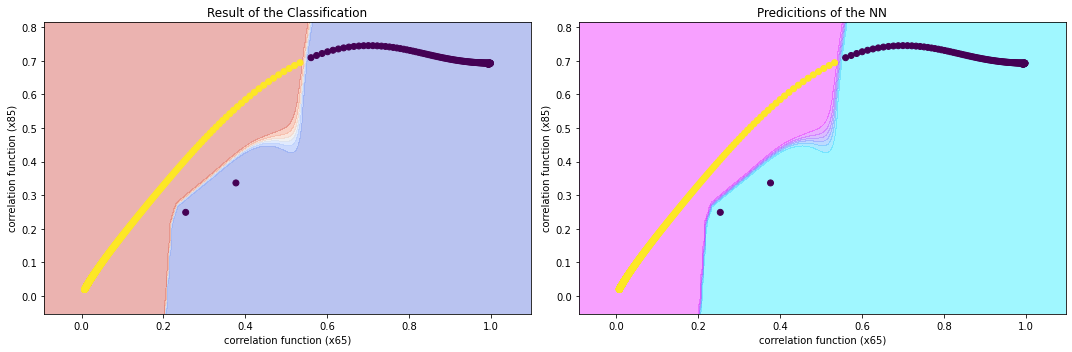

In [91]:
Y_predict = (model.predict(X)>.5).astype(int)

x1_list, x2_list = grid(X[:,0], X[:,1], n_points=210)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T
Y_grid = model.predict( X_grid ).reshape(x1_list.shape )
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121 , xlabel = 'correlation function (x65)', ylabel='correlation function (x85)', title = 'Result of the Classification')
    
ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(*X.T, c=y)    
# ax.text(3, 1.4, f'Accuracy: {np.round( model.score(X_test.T, Y_test) , 3)}' , fontsize=20)

ax = fig.add_subplot(122 , xlabel = 'correlation function (x65)', ylabel='correlation function (x85)', title = 'Predicitions of the NN')
ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.cool)
plt.scatter(*X.T, c = Y_predict.reshape(-1))


plt.tight_layout()
plt.show()



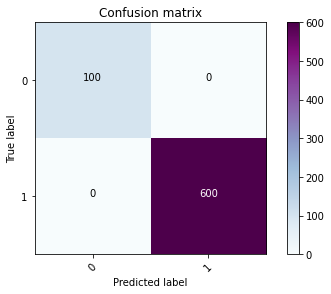

In [92]:
cm = confusion_matrix(Y_predict, y)
plot_confusion_matrix(cm,[0,1])

In [93]:
X = data.iloc[:,[14, 69]]
X = np.array(X)
X_train, X_test, Y_train, Y_test  = train_test_split(X, y, random_state= 0)
history = model.fit(X_train, Y_train, epochs=100, batch_size=30,  verbose=1)

Epoch 1/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0020 - acc: 0.9981
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0108 - acc: 0.9981
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0037 - acc: 0.9981
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 8.3447e-04 - acc: 1.0000
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 3.5831e-04 - acc: 1.0000
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 2.1716e-04 - acc: 1.0000
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 1.6524e-04 - acc: 1.0000
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 1.5499e-04 - acc: 1.0000
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 1.4163e-04 - acc: 1.0000
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 1.2727e-04 - acc: 1.0000
Epoch 11/100
18/18 [===========

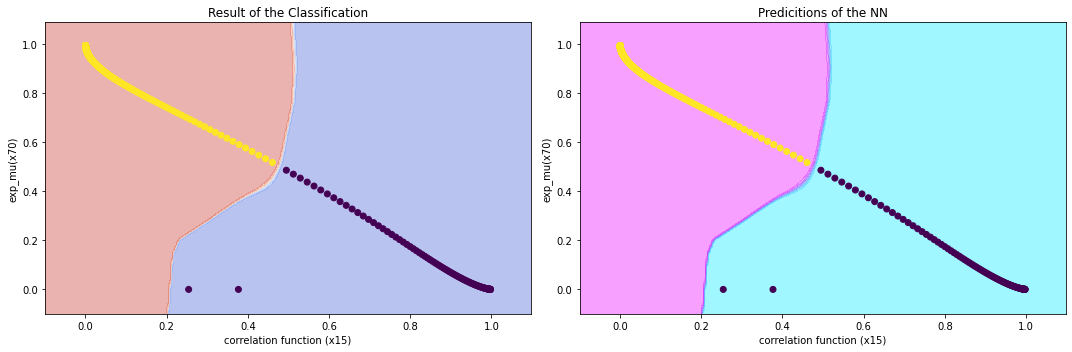

In [94]:
Y_predict = (model.predict(X)>.5).astype(int)

x1_list, x2_list = grid(X[:,0], X[:,1], n_points=210)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T
Y_grid = model.predict( X_grid ).reshape(x1_list.shape )
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121 , ylabel = 'exp_mu(x70)', xlabel='correlation function (x15)', title = 'Result of the Classification')
    
ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(*X.T, c=y)    
# ax.text(3, 1.4, f'Accuracy: {np.round( model.score(X_test.T, Y_test) , 3)}' , fontsize=20)

ax = fig.add_subplot(122 , ylabel = 'exp_mu(x70)', xlabel='correlation function (x15)', title = 'Predicitions of the NN')
ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.cool)
plt.scatter(*X.T, c = Y_predict.reshape(-1))


plt.tight_layout()
plt.show()



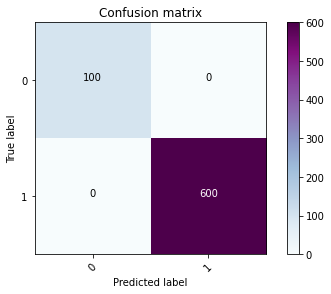

In [95]:
cm = confusion_matrix(Y_predict, y)
plot_confusion_matrix(cm,[0,1])

In [86]:
X = data.iloc[:,[4, 78]]
X = np.array(X)
X_train, X_test, Y_train, Y_test  = train_test_split(X, y, random_state= 0)
history = model.fit(X_train, Y_train, epochs=100, batch_size=30,  verbose=1)

Epoch 1/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6679 - acc: 0.9219
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0681 - acc: 0.9810
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0536 - acc: 0.9848
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0426 - acc: 0.9867
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0429 - acc: 0.9924
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0338 - acc: 0.9924
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0269 - acc: 0.9943
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0284 - acc: 0.9943
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0243 - acc: 0.9962
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0219 - acc: 0.9962
Epoch 11/100
18/18 [==============================] - 0s 4m

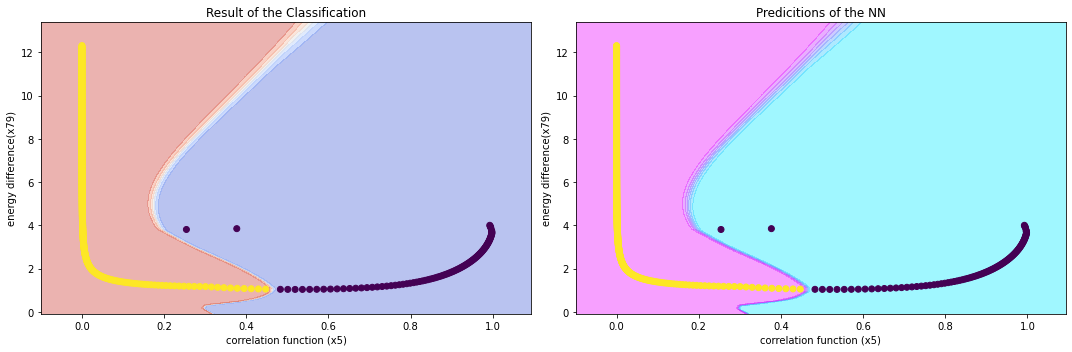

In [89]:
Y_predict = (model.predict(X)>.5).astype(int)

x1_list, x2_list = grid(X[:,0], X[:,1], n_points=210)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T
Y_grid = model.predict( X_grid ).reshape(x1_list.shape )
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121 , ylabel = 'energy difference(x79)', xlabel='correlation function (x5)', title = 'Result of the Classification')
    
ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(*X.T, c=y)    
# ax.text(3, 1.4, f'Accuracy: {np.round( model.score(X_test.T, Y_test) , 3)}' , fontsize=20)

ax = fig.add_subplot(122 , ylabel = 'energy difference(x79)', xlabel='correlation function (x5)', title = 'Predicitions of the NN')
ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.cool)
plt.scatter(*X.T, c = Y_predict.reshape(-1))


plt.tight_layout()
plt.show()



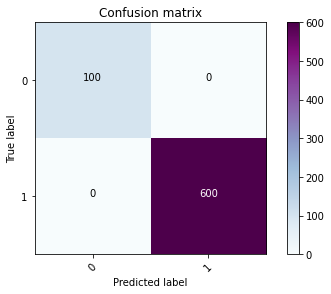

In [96]:
cm = confusion_matrix(Y_predict, y)
plot_confusion_matrix(cm,[0,1])

In [97]:
X = data.iloc[:,[24, 44]]
X = np.array(X)
X_train, X_test, Y_train, Y_test  = train_test_split(X, y, random_state= 0)
history = model.fit(X_train, Y_train, epochs=100, batch_size=30,  verbose=1)

Epoch 1/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0652 - acc: 0.9905
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0645 - acc: 0.9924
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0283 - acc: 0.9943
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0250 - acc: 0.9943
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0273 - acc: 0.9962
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0213 - acc: 0.9962
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0193 - acc: 0.9943
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0183 - acc: 0.9962
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0187 - acc: 0.9962
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0164 - acc: 0.9962
Epoch 11/100
18/18 [==============================] - 0s 3m

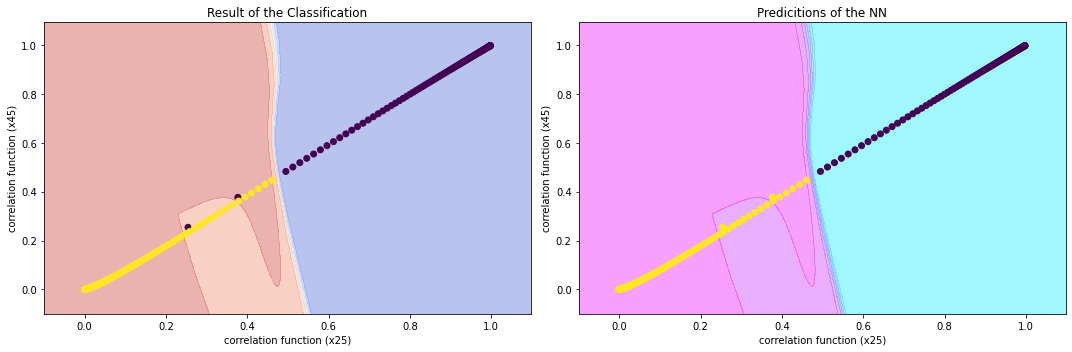

In [98]:
Y_predict = (model.predict(X)>.5).astype(int)

x1_list, x2_list = grid(X[:,0], X[:,1], n_points=210)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T
Y_grid = model.predict( X_grid ).reshape(x1_list.shape )
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121 , xlabel = 'correlation function (x25)', ylabel='correlation function (x45)', title = 'Result of the Classification')
    
ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(*X.T, c=y)    
# ax.text(3, 1.4, f'Accuracy: {np.round( model.score(X_test.T, Y_test) , 3)}' , fontsize=20)

ax = fig.add_subplot(122 , xlabel = 'correlation function (x25)', ylabel='correlation function (x45)', title = 'Predicitions of the NN')
ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.cool)
plt.scatter(*X.T, c = Y_predict.reshape(-1))


plt.tight_layout()
plt.show()



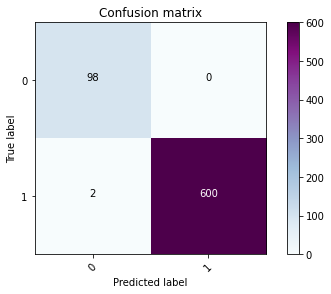

In [99]:
cm = confusion_matrix(Y_predict, y)
plot_confusion_matrix(cm,[0,1])

**The** **End** **!**